# 2.1 PROBABILITY DISTRIBUTION TABLE - 5 MARKS

You have been studying hard on your latest assignment and asked your fellow studentsfor
some tips:

•Tip 1 “Study hard and you will do well, fail to do so and you will not”

•Tip 2 “Get plenty of rest and you will do well, fail to do so and you will not”

•Tip 3 “Set an an alarm and you will get up in time, fail to do so and you will not”.

<img src="https://drive.google.com/file/d/1PdvdW4GzGtGQ3x1SKrkAQl-f5vMWBqA7/view?usp=sharing" height="860" width="1040">

Link: https://drive.google.com/file/d/1PdvdW4GzGtGQ3x1SKrkAQl-f5vMWBqA7/view?usp=sharing

Data
     Tip  Never  Rarely  Sometimes  Often  Always
0  Tip 1      1       4          6     12      23
1  Tip 2     12       4         12      4       2
2  Tip 3     24       2          5      4       4

Probability Distribution Table - Normal Distribution
     Tip     Never    Rarely  Sometimes     Often    Always  Mean    SD
0  Tip 1  0.029424  0.027065   0.047119  0.048062  0.010635   9.2  7.78
1  Tip 2  0.044704  0.027065   0.044704  0.031232  0.049786   6.8  4.31
2  Tip 3  0.006813  0.037976   0.046095  0.031232  0.043866   7.8  8.16

pdf plotting - Normal Distribution

pdf plotting - Random Numbers


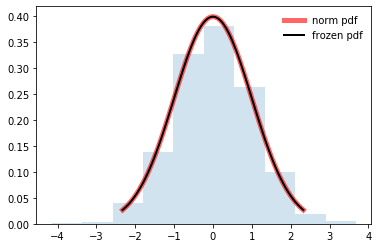


pdf plotting - Tip  1


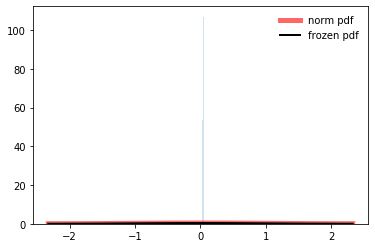


pdf plotting - Tip  2


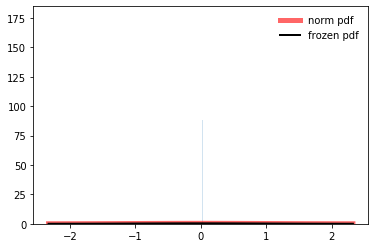


pdf plotting - Tip  3


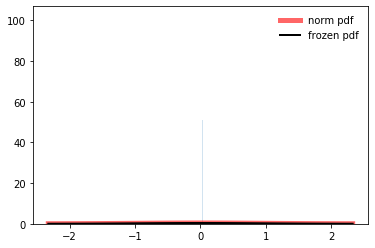

In [2]:
"""
2.1 PROBABILITY DISTRIBUTION TABLE
"""



# Importing libraries
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

import numpy as np

# Plotting Function norm pdf & frozen pdf

def plot_pdf(r):    
    
    fig, ax = plt.subplots(1, 1)
    
    x = np.linspace(norm.ppf(0.01),norm.ppf(0.99) ,100)
    ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
    
    rv = norm()
    ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
    
    vals = norm.ppf([0.001, 0.5, 0.999])
    np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
        
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    
    return plt.show() 

# Loading the dataset

data_frame = pd.read_csv('PDT_data_in.csv', sep=",",
                         usecols=['Tip','Never','Rarely','Sometimes','Often',
                                  'Always'])
df = pd.DataFrame(data=data_frame)

df_pdt = df.copy()
Mean = {'Mean': [0,0,0]}
StandardDeviation = {'SD': [0,0,0]}
df_pdt=df_pdt.join(pd.DataFrame(Mean))
df_pdt=df_pdt.join(pd.DataFrame(StandardDeviation))

print("=======================================================================")
print("Data")
print("=======================================================================")
print(df)
print("=======================================================================\n")

# Building a probability distribution table (Normalization approach)

## Mean, Variance, and Standard Deviation of the distribution per Tip

for i in range (0,3):
    
    data_df = pd.DataFrame(data = df.values[i][1:])
    
    mean_tip, sd_tip = norm.fit(data_df)
    
    if i==0:
        df_additional = pd.DataFrame({'Tip 1':[mean_tip, sd_tip]})
    else:
        new_name = str('Tip ')+str(i+1)
        df_new = pd.DataFrame({new_name:[mean_tip, sd_tip]})
        df_additional = df_additional.join(df_new)

df_additional = df_additional.T
df_pdt['Mean']=df_additional[0].values
df_pdt['Mean']=round(df_pdt['Mean'], ndigits=2)
df_pdt['SD']=df_additional[1].values
df_pdt['SD']=round(df_pdt['SD'], ndigits=2)

## Computing Probability density function

for i in range (0,3):

    mean = df_pdt.values[i][6]
    sd = df_pdt.values[i][7]
    
    for j in range (0,5):
     
        value = df_pdt.values[i][1+j]
        prob = norm.pdf(value, mean, sd)
        col = df_pdt.columns[1+j]
        df_to_update = df_pdt[col].replace(value,prob)
        df_pdt[col].update(df_to_update)

print("=======================================================================")
print("Probability Distribution Table - Normal Distribution")
print("=======================================================================")
print(df_pdt)
print("=======================================================================\n")

  
# Plotting pdf

print("=======================================================================")
print("pdf plotting - Normal Distribution")
print("=======================================================================\n")

print("=======================================================================")
print("pdf plotting - Random Numbers")
print("=======================================================================")

r = norm.rvs(size=1000) #Random Numbers test
plot_pdf(r)
 
## r vectors

for i in range (0,3):

    print("\n=======================================================================")
    print("pdf plotting - Tip ", i+1)
    print("=======================================================================")
    
    r = df_pdt.values[i][1:-2]
    plot_pdf(r)
    

    
    

 